In [1]:
import pandas as pd
import cvxpy as cp

<Axes: xlabel='Date'>

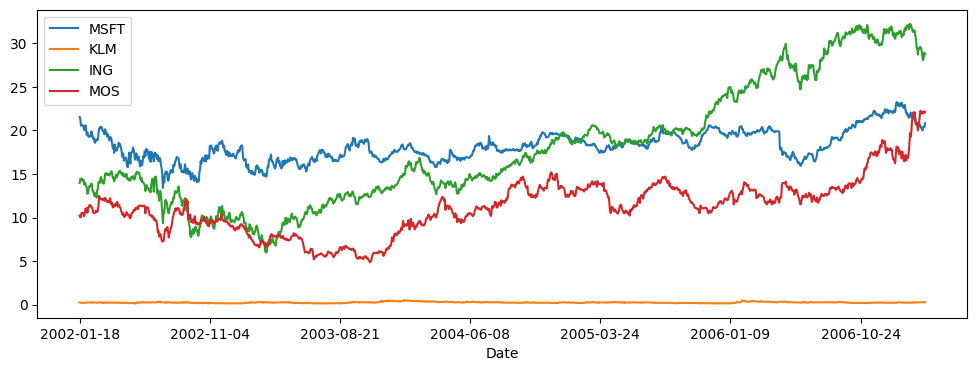

In [5]:
df = pd.read_csv("c:/Users/Userpc/Desktop/Projects/ML Shortcuts/Data/stocks.csv").iloc[500:1800]
df.set_index("Date").plot(figsize=(12, 4))

In [7]:
df_returns = df.set_index("Date").diff()
df_returns.mean()

MSFT   -0.000547
KLM     0.000008
ING     0.011386
MOS     0.009176
dtype: float64

In [8]:
df_returns.std()

MSFT    0.281751
KLM     0.022894
ING     0.313000
MOS     0.280967
dtype: float64

In [14]:
df_mean = df_returns.mean().values
cov_stock = df_returns.cov().values
cov_stock

array([[ 7.93837534e-02,  3.71382633e-05,  4.25177071e-02,
         1.81678083e-02],
       [ 3.71382633e-05,  5.24113962e-04, -8.05961917e-05,
        -2.40440495e-04],
       [ 4.25177071e-02, -8.05961917e-05,  9.79691108e-02,
         2.68462116e-02],
       [ 1.81678083e-02, -2.40440495e-04,  2.68462116e-02,
         7.89423872e-02]])

$$
max\ \mu^Tx = px^TCx
$$

In [17]:
x = cp.Variable(len(df_mean))

stock_return = df_mean @ x
stock_risk = cp.quad_form(x, cov_stock)

p = 1
objective = cp.Maximize(stock_return - p * stock_risk)
constraints = [x >= 0, cp.sum(x) == 1]
prob = cp.Problem(objective=objective, constraints=constraints)
prob.solve(), x.value

(6.289347782495306e-05,
 array([-1.40643068e-24,  9.00502860e-01,  4.98638391e-02,  4.96333004e-02]))